# **Project Name:- Netflix Movies and TV Shows Clustering**



*   Project type:- Unsupervised
*   Contribution:- Individual


1.   Team Member 1:- Kanchan Yadav




# Project Summary:-

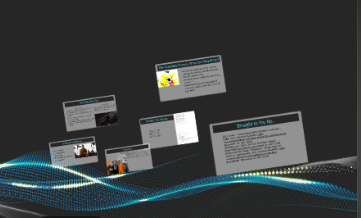


Summary:-

People justify spending time in the evening in front of a television or computer for many reasons. Everyday households with a Netflix account can sit down in front of a television, start watching a series, tv shows, movies and escape from reality. Watching Netflix is really a positive way to relieve stress or if it is actually taking up most of their free time.

Netflix has become something that affects many lives in many areas. So, in this project we will be anaysing and explore  the dataset of netflix and try to predict variour trends, genres, country with  maximum releases, population of netflix across year, etc.


# Github link:-
1. **Kanchan**:-

# **Problem Statement:-**
The dataset consist of tv shows and movies available on netflix as of 2019. The dataset is collected from a third-party Flixable. In 2018 Netflix released a report showing the number of movies have decreased more than 2000 titles since 2010, while on the same scale we can see that the number of tv shows have increased.

**Lets Begin:-**

### Importing the essential libraries.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from time import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import missingno as msno
%matplotlib inline

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [ ]:
# for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch

In [ ]:
# pip install missingno

### Loading the data.

In [ ]:
kanchan= pd.read_csv('NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv', parse_dates= ['date_added', 'duration'])
kan= kanchan.copy()

FileNotFoundError: ignored

### Dataset First View

In [ ]:
# understaing the data

In [ ]:
kan.head()

### Dataset Rows & Columns count

In [ ]:
#shape of the dataset
shape=kan.shape
print("Rows :"+str(shape[0]) +", Columns :"+str(shape[1]))

### Dataset Information

In [ ]:
kan.info()

In [ ]:
kan.describe(include='all')

#### Duplicate Values

In [ ]:
len(kan[kan.duplicated()])

In [ ]:
kan.duplicated().sum()

*   There is no duplicates in the data

#### Missing Values/Null Values

In [ ]:
kan.isnull().sum()

 *    So we are having 2389 null values in director, 718 nulls in cast, 507 null in country, 10 in date_added and 7 null values in rating.





##### Visualizing the missing values

In [ ]:
sns.heatmap(kan.isnull())

In [ ]:
msno.matrix(kan)

In [ ]:
msno.heatmap(kan)

*   We found that direct, cast,country are having missing values whereas date_added and
*   Rating are having less missing values

##### Check count of unique id's in the dataset

In [ ]:
kan.nunique()

### Dataset Information

##### Understanding the variables

In [ ]:
kan.columns

In [ ]:
kan.describe()



*   Variable description:- in variable description we have to describe the columns like
*   Release_year: date of release of the movie or tv show
*  Director : director of the movie

### WE FOUND THAT:-
 We found that our dataset contains

1.   We found that our dataset contains
2.   Our dataset contains 7787 rows and 12 columns
3.   There is no duplicates in our data
4.   There are null values present in the column director, cast, country, date_added, rating
5.   All the columns has almost unique values

### DATA WRANGLING

## **. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

#### **Univariate analysis**

##### Column no 1

In [ ]:
kan['type'].value_counts()

In [ ]:
plt.figure(figsize= (15,8))
sns.countplot(x= 'type', data= kan, color= 'b', palette= 'rocket')

*  **So here we found that netfix contains more movies than tv_shows it has 5377 movies and 2410 tv_shows**

 Better visualization with pie chart

In [ ]:
sns.set_palette('gist_ncar')
kan['type'].value_counts().plot(kind='pie', autopct= '%1.0f%%', explode= (0.05,0.05))
plt.title('Distribution of type', fontsize= 23, fontweight= 'bold')



*  **Here we found that netflix contains 69% movies and 31% tv_shows**

In [ ]:
kan.head(2)

##### Column no. 2 title
 We will not go for value_counts cause it has almost every values as unique

In [ ]:
kan['title'].nunique()

In [ ]:
# word cloud import
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [ ]:
# subsetting the dataset
df_wc= kan['title']
text= " ".join(i for i in df_wc)
# create stopword list
stopwords= set(STOPWORDS)
# generating a word cloud_image
wordcloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)
# display the generated image
plt.imshow(wordcloud, interpolation= 'nearest')
plt.axis('off')
plt.show


*  We see that world, love, man,story,life, girl are the most common titles we can feel like christmas as major attain

##### **Column no 3. Director**

In [ ]:
kan['director'].value_counts()

*   As director column is haivng missing values so we will be checking that which is having more missing

In [ ]:
missing_director= kan[kan['director'].isna()]
# sns.countplot(missing_director['type'])
sns.countplot(x= 'type', data= missing_director, color= 'b', palette= 'rocket')

 *  We see that tv_shows are having more missing data then movies in director column

In [ ]:
# checking the top 10 directors
plt.figure(figsize= (15,8))
graph= sns.countplot(x= 'director', data= kan, order= kan['director'].value_counts().head(10).index)
graph.set_title('the list of top 10 directors of netflix are', fontsize= 23, fontweight= 'bold')

 *  We found that director (Raul Campos and Jan Sute have directed 18 movies, Marcus Raboy has directed 16 movies, Jay karas has 14 movies, Cathy Garcia has 13 movies and Bussef martin and Jay has directed 12 movies and so on.)

In [ ]:
# filling up the nan values
kan.director.fillna(" ", inplace=True)

In [ ]:
# column no 4
kan['cast'].nunique()
# so here i have lots of unique datas so

In [ ]:
# filling up the nan values
kan['cast'].fillna(" ", inplace= True)

In [ ]:
kan.cast

In [ ]:
# getting the top 10 actors on netflix
actor= kan[kan.cast != " "].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# actor= kan[kan.cast != " "].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# getting the count plot
sns.countplot(y=actor, order= actor.value_counts().index[:10], palette= 'rocket')
plt.title('the list of top 10 actors on netflix are', fontsize=20, fontweight= 'bold')
plt.show()

*  We found that Anupam Kher is the top actor on netflix followed by Shah Rukh Khan
*  Anupam kher has done more than 40 movies and shah rukh khan has done 35 movies on netflix
* Nasiruddin shah and om puri has done in 30 movies on netflix
* Akshay kumar and takahiro sakurai has done 29 movies followed by amitabh bachchan, paresh rawal,
* Yuki kaji and boman irani has done 27 movies on netflix**

In [ ]:
# getting the top 10 countries on netflix
coun= kan[kan.cast != " "].set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
# actor= kan[kan.cast != " "].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# getting the count plot
sns.countplot(y=coun, order= coun.value_counts().index[:10], palette= 'rocket')
plt.title('the list of top 10 countries on netflix are', fontsize=20, fontweight= 'bold')
plt.show()

*  We found that United states is the top country on netflix
*   The second top country that we found is india which is followed by United Kingdom

In [ ]:
# column date_added
#  here from this column we will get the year and the month in which the show or movies are added on netflix
#  for this we will extract these
kan['year_added']= kan['date_added'].dt.year
kan['month_added']= kan['date_added'].dt.month

In [ ]:
# now we found the year and the month so we will count the no. of shows and movies added according to the year
kan['year_added'].value_counts().reset_index().rename(columns={ 'index': 'year', 'year_added': 'movie_count'})

In [ ]:
# visualizing the above result
plt.figure(figsize= (15,8))
sns.set(style='darkgrid')
ax= sns.countplot(y='release_year',data= kan, palette= 'Set3', order= kan['release_year'].value_counts().index[0:15])

*  2018 has the maximum no_of_release
*  2017 is the second largest release_year followed by 2019,2016,2020
* The growth of movie release_yearly indicates public interest toward netflix movies and tv_shows

In [ ]:
# next column release _year
# here we will be checking the total content released per year
yearly_movies= kan[kan.type=='Movie']['release_year'].value_counts().sort_index(ascending= False).head(10)
yearly_shows= kan[kan['type']=='TV Show']['release_year'].value_counts().sort_index(ascending= False).head(10)
total_content= kan['release_year'].value_counts().sort_index(ascending=False).head(10)

In [ ]:
fig,ax= plt.subplots(figsize=(12,6))
sns.lineplot(data= total_content, marker= 'o',
            markersize= 12)
sns.lineplot(data= yearly_shows, marker= 'o',
            markersize= 12)
sns.lineplot(data= yearly_movies, marker= 'o',
            markersize= 12)

# setting the range
ax.set_xticks(np.arange(2012,2022,1))
plt.title('Total content Released each year', fontsize=12, fontweight= 'bold')
plt.legend(['Total', 'Movie','TV Show'])
plt.ylabel('Releases')

*  Here we prove that the netflix report regarding no_of_tv_shows are the triple is correct we can see that the number of tv_shoes have tripple after 2015
Tv_shows has decrease after 2018 maybe because people started liking more of a netflix movies


In [ ]:
# rating columns
kan['rating'].unique()

In [ ]:
# rating_replacements = {
#     67: 'TV-PG',
#     2359: 'TV-14',
#     3660: 'TV-MA',
#     3736: 'TV-MA',
#     3737: 'NR',
#     3738: 'TV-MA',
#     4323: 'TV-MA '
# }

# for id, rate in rating_replacements.items():
#     kan.iloc[id, 8] = rate

In [ ]:
 ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

kan['rating'] = kan['rating'].replace(ratings_ages)
kan['rating'].unique()

In [ ]:
kan['rating']

In [ ]:
# creat a better chart with pie chart using plotly
import plotly.express as px
# pie chart code
graph= px.pie(kan, names= 'rating', height= 500,width= 900,hole= 0.7, title= "netflix rating distribution")
graph.show()

In [ ]:
# pip install plotly

 *  The pie chart predict that the number of adult rating is higher than any other which is followed by teen older kids and kids

In [ ]:
# plotting a graph to differentiate between tv shows and movies
plt.figure(figsize = (15,8))
sns.countplot(x='rating', hue= 'type', data= kan, palette= 'magma')
plt.title('count of tv shows and movies')
plt.show()

*  We found that the no.of adult watching tv shows and movies are greater then any other we see the second top watcher's of netflix is the teen populations followed by older kids being the third top while the count of watching is quite similiar in case of kids

In [ ]:
# column duration
kan['duration'].unique()

In [ ]:
# subsetting for the tv shows and movies
netflix_tv_shows= kan[kan['type']== 'TV Shows']
netflix_movies= kan[kan['type']=='Movie']

In [ ]:
# movies duration setting and changing type
netflix_movies['duration']= netflix_movies['duration'].str.replace(' min','')
# changing type to int for visualization
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)
netflix_movies['duration']

In [ ]:
# duration of movies
sns.set_style('whitegrid')
sns.kdeplot(data=netflix_movies['duration'],shade= True)

* Netflix movies has 70-120 most minutes of duration.

In [ ]:
# analysing the duration of tv_shows
netflix_tv_shows['duration']= netflix_tv_shows['duration'].str.replace(' Season','')
netflix_tv_shows['duration']= netflix_tv_shows['duration'].str.replace(' Seasons','')
netflix_tv_shows['duration']= netflix_tv_shows['duration'].str.replace('s','')
netflix_tv_shows['duration']=netflix_tv_shows['duration'].astype(str).astype(int)
netflix_tv_shows['duration']

In [ ]:
# duration of movies
plt.figure(figsize= (15,8))
sns.set_style('whitegrid')
sns.kdeplot(data=netflix_tv_shows['duration'],shade= True)
x= netflix_tv_shows['duration']

##### Column listed_in

In [ ]:
kan['listed_in'].unique
# for this analysis we are creating genres

In [ ]:
no_of_category= []
for categories in kan['listed_in'].values:
    len_categories= len(categories.split(','))
    no_of_category.append(len_categories)

In [ ]:
kan['no_of_category']= no_of_category

In [ ]:
kan[['listed_in','no_of_category']].head()

In [ ]:
# creating genre
genre= kan.set_index('title').listed_in.str.split(', ',expand= True).stack().reset_index(level= 1, drop= True);
genre

In [ ]:
# visualizing the above result
plt.figure(figsize= (7,9))
g = sns.countplot(y= genre, order= genre.value_counts().index ,palette='Set3')
plt.title('top 10 genres')

In [ ]:
# drawing a word graph
plt.subplots(figsize= (15,15))
# generating the word cloud image
wordcloud= WordCloud(
                    background_color= 'white',
                    width= 1920,
                    height= 1080
                    ).generate(" ".join(genre))
# displaying the generated image
plt.imshow(wordcloud)
plt.axis('off')
plt.show

*  We found that international movies, tv shows, international dramas, comedies, adventure, action are in huge demand on netflix. Even though usa is the top country, netflix has most number of international genres

In [ ]:
kan['genre'] = kan['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
kan['genre'].value_counts()

### Bivariate Analysis
Country wise trend anaysis

In [ ]:
# country vs genre trend
kan['country'].nunique

In [ ]:
# creating a function for genres country wise
def genre_country_trend(kan):
    def explore_country(country):
        #executing split on the basis of ',' or otherwise return ''
        try:
            return country.split(', ')
        except:
            return ''
    # executing separate country list and genre list
    kan['country_list']= kan.apply(lambda x: explore_country(x['country']),axis =1)
    kan= kan.explode('country_list')

    kan['genre_list']= kan.apply(lambda x: explore_country(x['listed_in']),axis= 1)
    kan= kan.explode('genre_list')


    #finding country and their preferred genres
    kan.groupby(['country_list','genre_list']).agg({'title': 'count'})
    grouped_kan= kan.groupby(['country_list','genre_list']).agg({'title': 'count'})
    grouped_kan= grouped_kan.reset_index()
    grouped_kan['country_list'].values
    grouped_kan= grouped_kan[grouped_kan['country_list'] != '']
    rating_country_kan= grouped_kan.reset_index().drop('index',axis=1)

    # visualizing country vs genre trend
    list_of_countries= list(set(list(rating_country_kan['country_list'].values)))
    for each in list_of_countries:
        rating_country_kan[rating_country_kan['country_list']== each].sort_values('title', ascending= False).plot.bar(x= 'genre_list')
        plt.title(f'{each}')
    return rating_country_kan

In [ ]:
rating_country_kan= genre_country_trend(kan)

*   We found France has more number of watches over international drama and secondly on Dramas
*   Japan has more watches towards international tv shows and anime series
*   India has most watches towards international movies and secondly on Dramas
*   People in Korea watch more international tv shows and koream tv shows
*   People of Somalia watch only Dramas
*   China watch more of international movies, action and adventure.
*   Cambodian population watch Dramas and international movies.
*   Canadian has maximum watches towards comedies, Secondaly Dramas,the youth watch more of a children and family movies
*  United States has maximum watches towards Dramas, Comedies, Documentaries.
*   Bulgarian has most watches towards Action and adventure then the second highest over there is international movies then thrillers.

In [ ]:
# word cloud for the top countries
def word_cloud(rating_country_kan):
    country_list= ['United States','India', 'United Kingdom','France', 'China']
    # using word cloud to identify the most used word
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
    for items in country_list:
        plt.rcParams['figure.figsize']= (10,10)
        wordcloud= WordCloud(stopwords= STOPWORDS, background_color= 'white', width= 1000, height= 500, max_words=121).generate(" ".join(genre))
        plt.imshow(wordcloud)
        plt.axis('off')
        plt.title(f'most popular genres for {items}', fontsize = 10)
        plt.show()

In [ ]:
word_cloud(rating_country_kan)

*  We found that international tv shows and movies are most popular in these countries.
*  International dramas, action, adventure and movies are most preferred by chinese people.
*  France has more population driven towards tv shows and international movies, tv, action and adventure
*  The people in united kingdom watch more number of international dramas, movies shows, etc.
* Indian people are more driven towards international movies, tv, action, adventure, drama and shows*

In [ ]:
# country vs rating analysis
# creating a function for genres country wise
def rating_country_trend(kan):
    def explore_country(country):
        #executing split on the basis of ',' or otherwise return ''
        try:
            return country.split(', ')
        except:
            return ''
    # executing separate country list and genre list
    kan['country_list']= kan.apply(lambda x: explore_country(x['country']),axis =1)
    kan= kan.explode('country_list')

#     kan['rating_list']= kan.apply(lambda x: explore_country(x['listed_in']),axis= 1)
#     kan= kan.explode('rating_list')

    #finding country and their preferred genres
    kan.groupby(['country_list','genre_list

In [ ]:
# country vs rating analysis
# creating a function for genres country wise
def rating_country_trend(kan):
    def explore_country(country):
        #executing split on the basis of ',' or otherwise return ''
        try:
            return country.split(', ')
        except:
            return ''
    # executing separate country list and genre list
    kan['country_list']= kan.apply(lambda x: explore_country(x['country']),axis =1)
    kan= kan.explode('country_list')

#     kan['rating_list']= kan.apply(lambda x: explore_country(x['listed_in']),axis= 1)
#     kan= kan.explode('rating_list')

    #finding country and their preferred genres
#     kan.groupby(['country_list','rating']).agg({'title': 'count'})
    grouped_kan= kan.groupby(['country_list','rating']).agg({'title': 'count'})
    grouped_kan= grouped_kan.reset_index()
    grouped_kan['country_list'].values
    grouped_kan= grouped_kan[grouped_kan['country_list'] != '']
    rating_country_kan= grouped_kan.reset_index().drop('index',axis=1)

    # visualizing country vs genre trend
    list_of_countries= list(set(list(rating_country_kan['country_list'].values)))
    for each in list_of_countries:
        rating_country_kan[rating_country_kan['country_list']== each].sort_values('title', ascending= False).plot.bar(x= 'rating')
        plt.title(f'{each}')
    return rating_country_kan

In [ ]:
rating_country_kan= rating_country_trend(kan)

* inference based on country vs rating
  * France and Japan has most rating on adults then teems then older kids and lastly on kids.
  * India has most rating towards teens then adults then older kids and then kids
  * New Zealand has maximum rating on adults then older kids then teens

In [ ]:
# country vs rating analysis
# creating a function for genres country wise
def type_country_trend(kan):
    def explore_country(country):
        #executing split on the basis of ',' or otherwise return ''
        try:
            return country.split(', ')
        except:
            return ''
    # executing separate country list and genre list
    kan['country_list']= kan.apply(lambda x: explore_country(x['country']),axis =1)
    kan= kan.explode('country_list')

#     kan['rating_list']= kan.apply(lambda x: explore_country(x['listed_in']),axis= 1)
#     kan= kan.explode('rating_list')

    #finding country and their preferred genres
#     kan.groupby(['country_list','rating']).agg({'title': 'count'})
    grouped_kan= kan.groupby(['country_list','type']).agg({'title': 'count'})
    grouped_kan= grouped_kan.reset_index()
    grouped_kan['country_list'].values
    grouped_kan= grouped_kan[grouped_kan['country_list'] != '']
    rating_country_kan= grouped_kan.reset_index().drop('index',axis=1)

    # visualizing country vs genre trend
    list_of_countries= list(set(list(rating_country_kan['country_list'].values)))
    for each in list_of_countries:
        rating_country_kan[rating_country_kan['country_list']== each].sort_values('title', ascending= False).plot.bar(x= 'type', y= '')
        plt.title(f'{each}')
    return rating_country_kan

In [ ]:
type_country_trend(kan)

In [ ]:
kan.type.value_counts()

In [ ]:
kan.info()

*  Preferred month to release movies by netflix

In [ ]:
plt.figure(figsize= (15,8))
sns.countplot(x= kan['month_added'], color='skyblue')
plt.title('monthly content on netflix', fontsize= 15, fontweight= 'bold')

In [ ]:
# inference

### Preprocessing and nlp

In [ ]:
kan.description.iloc[0]

In [ ]:
first_description= kan.description.iloc[0]

*  Remove punctuation
1.  punctuation does not carry any meaning in the cluster.
2. if punctuation is present in the cluster it will add up noise to the data
removing the punctuation is the better option

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
kan['description']= kan['description'].apply(remove_punctuation)
kan.head().T

*  Removing punctuation
1. stop words are commonly used words in any language, not just english.
2. removing stop words helps us to focus on the important words.

##### Removing the stop words from nltk library

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
st= nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in st:
    print(i , end= ",   ")

In [ ]:
print('Number of stopwords in english are: ',len(st) )

In [ ]:
sw = stopwords.words('english')
# np.array(sw)
# print("Number of stopwords: ", len(sw))
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [ ]:
kan['description']= kan['description'].apply(stopwords)
kan.head().T

##### Using CountVectorizer

*  count vocabulary items using CountVectorizer
* counting vocabulary items is the important step in nlp
* it extract the most frequent used words from a particular column and create an dictionary which
* further use in text normalization process(stemming).

In [ ]:
# create a count vectorizer object
count_vectorizer= CountVectorizer()
# fit the count vectorizer using text data
count_vectorizer.fit(kan['description'])
# create the vocabulary object used in the vectorizer
dictionary= count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab= []
count_of_vocab= []
for key,value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

##### **Stemming**
Create a new dataframe vocab before stemming

In [ ]:
# store the count in pandas dataframe as index
vocab_before_stemming= pd.DataFrame({'Words': vocab,
                                   'count': count_of_vocab})
# store the dataframe
vocab_before_stemming= vocab_before_stemming.sort_values('count',ascending= False)

In [ ]:
vocab_before_stemming.head(20).T

##### Text Normalization
*  stemming
* stemming lets us standarized words to their base stem irrespective of their inflection, which helps many applications like clustering or classifying text.
* text engine use this technique extensively to give better results irrespective of the word from.
* when creating the search index we take similar terms and stem them to a root word so that searcheson other form of the word match our document.

##### we will be using SnowballStemmer('english')

In [ ]:
#  create an object of stem vectorizer
stemmer= SnowballStemmer('english')

In [ ]:
def apply_stemming(text):
    text= [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
kan['description']= kan['description'].apply(apply_stemming)
kan.head().T

### tfid vectorization
* TF-IDF is an abbrevation for term frequency inverse document frequency. This is very common algorithm to transfer text into a meaningful representation of numbers which is used to fit in machine learning algorithm for prediction
*  Tf-idf contains information on more important words and less important words as well
*  Tf gives us information on how often a term appears in a document and idf gives us information about relative rarity of a term in the collection of documents.#

In [ ]:
# creating object for Tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [ ]:
tfidf_vectorizer.fit(kan['description'])
dictionary = tfidf_vectorizer.vocabulary_.items()

In [ ]:
vocab= []
count_of_vocab= []
for key,value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
# store the count in pandas dataframe as index
vocab_after_stemming= pd.DataFrame({'Words': vocab,
                                   'count': count_of_vocab})
# store the dataframe
vocab_after_stemming= vocab_before_stemming.sort_values('count',ascending= False)

In [ ]:
top_15most_occured_vocab= vocab_after_stemming.head(15)
top_15most_occured_words= top_15most_occured_vocab.Words.values
top_15most_occured_words

In [ ]:
top15_most_occured_word_count= top_15most_occured_vocab['count'].values
top15_most_occured_word_count

In [ ]:
plt.figure(figsize= (15,8))
plt.xlim(19590,19610)
plt.barh(top_15most_occured_words,top15_most_occured_word_count)

In [ ]:
kan['length(description)'] = kan['description'].apply(lambda x: len(x))
kan.head(3).T

In [ ]:
kan['description'].iloc[0]

In [ ]:
len(kan['description'].iloc[0])

#### for features in listed_in

In [ ]:
kan['listed_in']= kan['listed_in'].apply(remove_punctuation)
kan.head().T

In [ ]:
kan['listed_in']= kan['listed_in'].apply(stopwords)

In [ ]:
# create a count vectorizer object
count_vectorizer= CountVectorizer()
# fit the count vectorizer using text data
count_vectorizer.fit(kan['listed_in'])
# create the vocabulary object used in the vectorizer
dictionary= count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab= []
count_of_vocab= []
for key,value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
# store the count in pandas dataframe as index
listed_in_vocab_before_stemming= pd.DataFrame({'Words': vocab,
                                   'count': count_of_vocab})
# store the dataframe
listed_in_vocab_before_stemming= listed_in_vocab_before_stemming.sort_values('count',ascending= False)

In [ ]:
listed_in_vocab_before_stemming.head().T

In [ ]:
listed_in_vocab_before_stemming.tail().T

In [ ]:
# top 15 most occured listed_in
top15_most_occured_vocab_listed_in= listed_in_vocab_before_stemming.head(15)

In [ ]:
top15_most_occured_words_listed_in= top15_most_occured_vocab_listed_in.Words.values
top15_most_occured_words_listed_in

In [ ]:
top15_most_occured_word_listed_in_count= top15_most_occured_vocab_listed_in['count'].values
top15_most_occured_word_listed_in_count

In [ ]:
plt.figure(figsize= (15,8))
plt.xlim(25,43)
plt.barh(top15_most_occured_words_listed_in,top15_most_occured_word_listed_in_count)

In [ ]:
# word cloud of top 15 words in listed_in

In [ ]:
plt.subplots(figsize= (16,8))
wordcloud= WordCloud(
                    background_color= 'white',
                    width= 1920,
                    height= 1080
                    ).generate(" ".join(top15_most_occured_words_listed_in))
# displaying the generated image
plt.imshow(wordcloud)
plt.axis('off')
plt.show

In [ ]:
kan['listed_in']= kan['listed_in'].apply(apply_stemming)
kan.head(3).T

In [ ]:
# creating object for Tf-idf Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(kan['listed_in'])
dictionary = tfidf_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab= []
count_of_vocab= []
for key,value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

In [ ]:
# store the count in pandas dataframe as index
vocab_after_stemming_listed_in= pd.DataFrame({'Words': vocab,
                                              'count': count_of_vocab})
# sort the dataframe by count
vocab_after_stemming_listed_in= vocab_after_stemming_listed_in.sort_values('count', ascending= False)

In [ ]:
# plot the graph of top vocabs in listed_in (after stemming )

In [ ]:
top15_most_occured_vocab_after_stemming= vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_occured_vocab_after_stemming_word= top15_most_occured_vocab_after_stemming.Words.values
top15_most_occured_vocab_after_stemming_word

In [ ]:
# top15_most_occured_word_listed_in_count_after_stemming= top15_most_occured_vocab_after_stemming_word['count'].values
# top15_most_occured_word_listed_in_count_after_stemming

In [ ]:
# plt.figure(figsize= (15,8))
# plt.xlim(25,43)
# plt.barh(top15_most_occured_vocab_after_stemming_word,top15_most_occured_word_listed_in_count_after_stemming
# )

In [ ]:
kan['length(listed_in)']= kan['listed_in'].apply(lambda x: len(x))
kan.head(3).T

 #### applying clustering

*  clustering is the most important step in unsupervised problem. It deals with filling the collection of unlabelled data. A loose defination can be "the process of organizing objects into groups whose members
are similar in some way" A cluster is therefore is a collection of similar objects between them and dissimilar to the object belonging to the other cluster.

In [ ]:
# X= cluster

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)


In [ ]:
k_values = range(1, 11)

In [ ]:
wcss = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
plt.figure(figsize= (15,8))
plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow method')
plt.show()

In [ ]:
y_pred = kmeans.predict(X)

In [ ]:
plt.figure(figsize= (16,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('K-Means Clustering')
plt.show()

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_transformed = pca.transform(X)

In [ ]:
plt.figure(figsize= (15,8))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA Transformation')
plt.show()

In [ ]:
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kanchan.target)
# plt.xlabel('PCA 1')
# plt.ylabel('PCA 2')
# plt.title('PCA for netfix Dataset')
# plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [ ]:
X, y_true = make_blobs(n_samples=300, centers= 4,
                       cluster_std=0.60, random_state=0)

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)

In [ ]:
dbscan.fit(X)
# Get the predicted cluster labels
y_pred = dbscan.labels_

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("DBSCAN Clustering")
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
y_dbscan = dbscan.fit_predict(X)

# create a scatter plot of the data points, colored by cluster
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, s=50, cmap='viridis')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
distances = pdist(X)

In [ ]:
Z = linkage(distances, method='complete')

In [ ]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [ ]:
n_clusters = 6
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete')
y = model.fit_predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Conclusion:-
*   The number of watches are more on movies than tv shows
*   people are more interested towards international tv shows and series and movies
*   more rating are on adults and teen
*   Most of the releases are from USA.
*   The claim of netflix that the number of movie has increased in the recent year are found to be true. We can see that the number of tv shows are decreased three times.